
# Assignment
Please answer the questions below based on the data provided:

1. Plot daily sales for all 50 weeks.

2. It looks like there has been a sudden change in daily sales. What date did it occur?

3. Is the change in daily sales at the date you selected statistically significant? If so, what 
is the p-value?

4. Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).

5. Assume a given day is divided into four dayparts:

night (12:00AM - 6:00AM),

morning (6:00AM - 12:00PM),

afternoon (12:00PM - 6:00PM),

evening (6:00PM - 12:00AM).


6. What is the percentage of sales in each daypart over all 50 weeks?

# Data Description

The datasets/ directory contains fifty CSV files (one per week) of timestamped sales data. Each row in a file has two columns:

sale_time - The timestamp on which the sale was made e.g. 2012-10-01 01:42:22

purchaser_gender - The gender of the person who purchased (male or female)

In [119]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp

In [39]:
file_pattern = 'sales_week_starting_*'
all_files = glob.glob (file_pattern) 

In [41]:
df = pd.concat(pd.read_csv(files) for files in all_files)
df

,sale_time,purchaser_gender
0,2012-10-01 01:42:22,female
1,2012-10-01 02:24:53,female
2,2012-10-01 02:25:40,female
3,2012-10-01 02:30:42,female
4,2012-10-01 02:51:32,male
...,...,...
4994,2013-09-15 23:30:51,female
4995,2013-09-15 23:42:02,female
4996,2013-09-15 23:43:24,male
4997,2013-09-15 23:43:32,male


In [43]:
combined_df.dtypes

sale_time           object
purchaser_gender    object
dtype: object

In [57]:
df['sale_day'] = pd.to_datetime(df['sale_time'])
df['sale_day'] = df['sale_day'].dt.date

In [66]:
sale_count = df.groupby('sale_day').size().reset_index(name = 'count')

In [68]:
sale_count

,sale_day,count
0,2012-10-01,514
1,2012-10-02,482
2,2012-10-03,499
3,2012-10-04,546
4,2012-10-05,476
...,...,...
345,2013-09-11,719
346,2013-09-12,735
347,2013-09-13,743
348,2013-09-14,655


Text(0.5, 1.0, 'sales count per day')

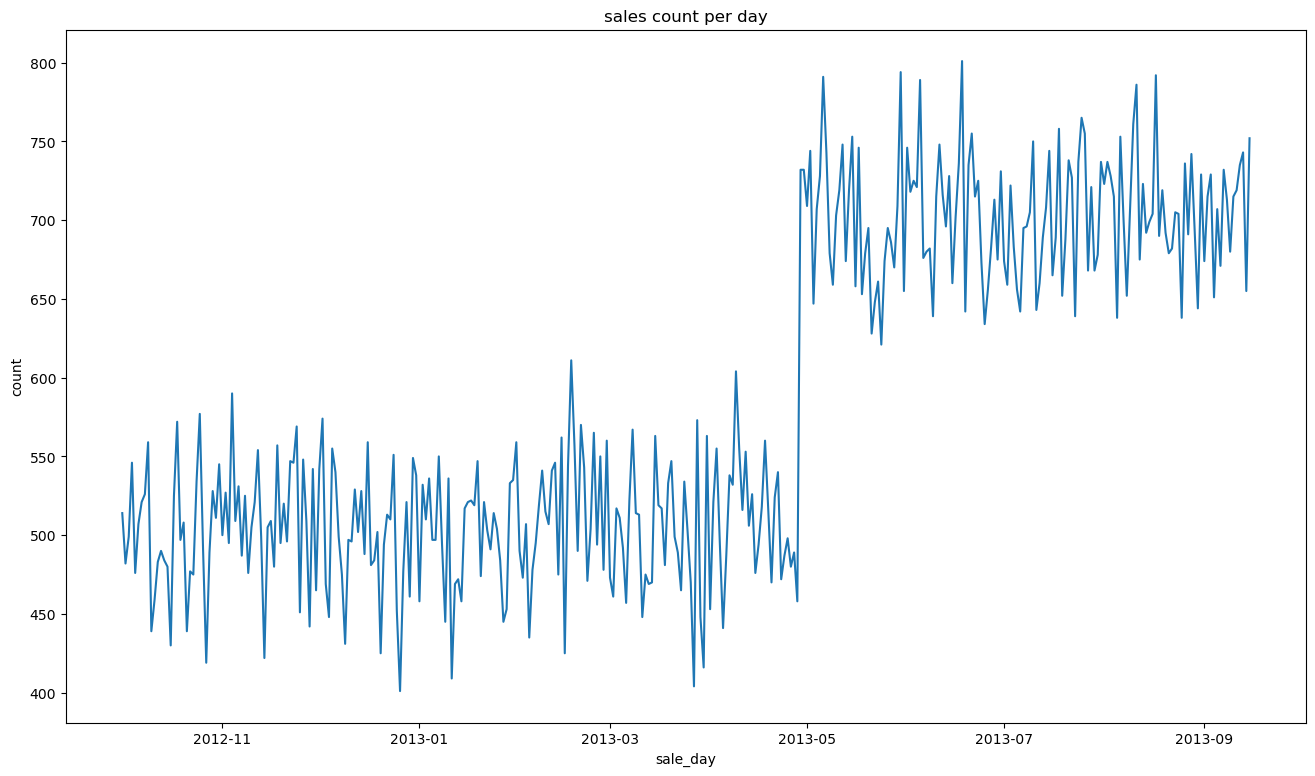

In [78]:
plt.figure(figsize = (16,9))
sns.lineplot(x=sale_count['sale_day'], y=sale_count['count'])
plt.title('sales count per day')

In [86]:
drop_day = sale_count[(sale_count['sale_day'] < pd.to_datetime('2013-06-01').date()) & (sale_count['sale_day'] > pd.to_datetime('2013-04-01').date())]
drop_day

,sale_day,count
183,2013-04-02,521
184,2013-04-03,555
185,2013-04-04,495
186,2013-04-05,441
187,2013-04-06,487
188,2013-04-07,538
189,2013-04-08,532
190,2013-04-09,604
191,2013-04-10,555
192,2013-04-11,516


An analysis of sales data revealed a significant upward shift in daily sales beginning on April 28 2013, the average sales were around 500. However, starting from April 29 2013, the average daily sales increased to round 700 
making a notable change in sales performance

To examinate if the sales increase on April 29th is statistically significant:
1. Formulate Hypotheses:
Null Hypothesis(H0): The observed increase in sales on April 29th is within random variation. The day is not statistical significant.
Alternative Hypothesis(H1): The sales on April 28th is significantly higher than usual.

2. Calculate P-value:
    a:  use sale count directly 
    b:  use sale different 

In [112]:
historical_sales = sale_count['count']
april_29 = sale_count['count'][sale_count['sale_day'] == pd.to_datetime('2013-04-29').date()]

In [121]:
t_stat, p_value = ttest_1samp(historical_sales, april_29)
print('t_stat =', t_stat)
print('p_value =', p_value)

t_stat = -26.367553024439697
p_value = 4.5681432390066193e-85


In [127]:
day_over_day_diff = []
lst_count =  sale_count['count']
for i in range(1, len(lst_count)):
    diff = lst_count[i]-lst_count[i-1]
    day_over_day_diff.append(diff)

diff_on_april_29 = 732-458
t_stat, p_value = ttest_1samp(day_over_day_diff, diff_on_april_29)
print('t_stat =', t_stat)
print('p_value =', p_value)


t_stat = -88.84860321865489
p_value = 3.0520000042500664e-241


t_stat is significanly large in both approach, indicating that the observed difference between sample mean and population mean is extremly significant.

p_value is far less than the typical significance threshold of 0.05, suggesting there is a strong evidence to reject the null hypothsis, which means the observed day is statistically significant and not caused by random variation.

In [137]:
gender_count = df.groupby(['sale_day','purchaser_gender']).size().reset_index(name = 'count')
gender_count

,sale_day,purchaser_gender,count
0,2012-10-01,female,413
1,2012-10-01,male,101
2,2012-10-02,female,379
3,2012-10-02,male,103
4,2012-10-03,female,386
...,...,...,...
695,2013-09-13,male,537
696,2013-09-14,female,193
697,2013-09-14,male,462
698,2013-09-15,female,230


In [145]:
female_count = gender_count[gender_count['purchaser_gender']=='female']
male_count = gender_count[gender_count['purchaser_gender']=='male']

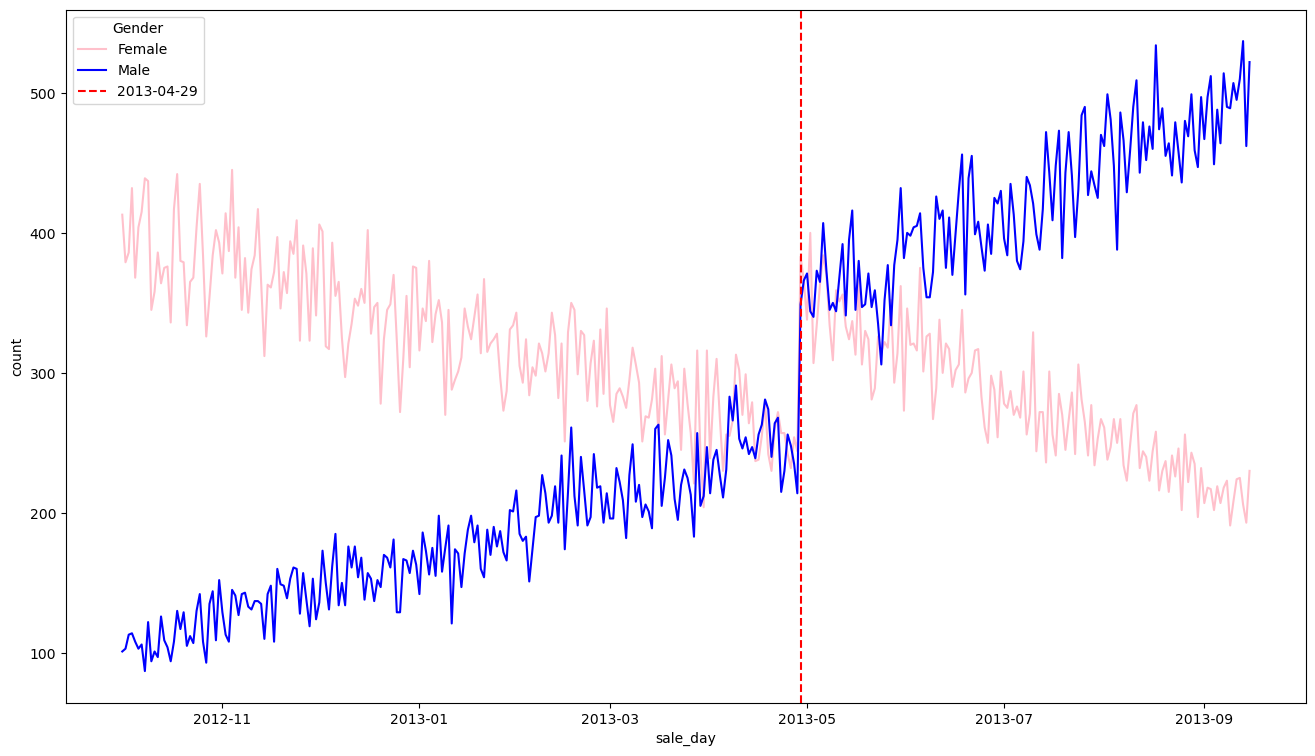

In [169]:
plt.figure(figsize = (16,9))
sns.lineplot(x=female_count['sale_day'], y=female_count['count'], color = 'pink', label = 'Female')
sns.lineplot(x=male_count['sale_day'], y=male_count['count'], color = 'blue', label = 'Male')
plt.axvline(x=pd.to_datetime('2013-04-29'), color='red', linestyle='--', label='2013-04-29')

plt.legend(title="Gender")

The line graph plot sales count on each day from male customer and female customer,
based on the red dot reference line on '2013-04-29', the data suggest that there is a drastically increase in both female and male customer.
Data point '2013-04-29' is also a break point where daily sales in male customer surpass daily sales in female customer.
Indicating that male customer is becoming the main customer demographic and our female customer is losing insterest after day'2013-04-29'.
Could possibly be a result of a political campaign where gender is involved.


In [237]:
df['sale_time'] = pd.to_datetime(df['sale_time'])
df['time'] = df['sale_time'].dt.time

In [241]:
daypart = []

night_start = pd.to_datetime('00:00:00').time()
morning_start = pd.to_datetime('06:00:00').time()
afternoon_start = pd.to_datetime('12:00:00').time()
evening_start = pd.to_datetime('18:00:00').time()


for time in df['time']:
    if night_start <= time < morning_start:
        daypart.append('night')
    elif morning_start<= time < afternoon_start:
        daypart.append('morning')
    elif afternoon_start <= time < evening_start:
        daypart.append('afternoon')
    else:
        daypart.append('evening')
df['daypart'] = daypart
df

,sale_time,purchaser_gender,sale_day,time,daypart
0,2012-10-01 01:42:22,female,2012-10-01,01:42:22,night
1,2012-10-01 02:24:53,female,2012-10-01,02:24:53,night
2,2012-10-01 02:25:40,female,2012-10-01,02:25:40,night
3,2012-10-01 02:30:42,female,2012-10-01,02:30:42,night
4,2012-10-01 02:51:32,male,2012-10-01,02:51:32,night
...,...,...,...,...,...
4994,2013-09-15 23:30:51,female,2013-09-15,23:30:51,evening
4995,2013-09-15 23:42:02,female,2013-09-15,23:42:02,evening
4996,2013-09-15 23:43:24,male,2013-09-15,23:43:24,evening
4997,2013-09-15 23:43:32,male,2013-09-15,23:43:32,evening


In [243]:
daypart_count = df.groupby('daypart').size().reset_index(name= 'daypart_count')
daypart_count = daypart_count.sort_values(by='daypart_count', ascending = False)

In [245]:
daypart_count

,daypart,daypart_count
0,afternoon,80533
2,morning,62870
1,evening,42620
3,night,18306


Text(0.5, 1.0, 'Daypart Distribution')

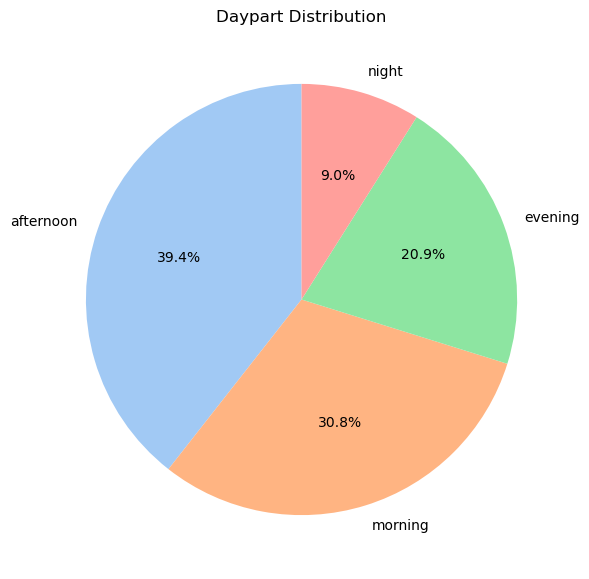

In [229]:
plt.figure(figsize=(7, 7))
plt.pie(daypart_count['daypart_count'], labels=daypart_count['daypart'], autopct='%1.1f%%',startangle=90, colors=sns.color_palette('pastel'))
plt.title('Daypart Distribution')
